## DATA 
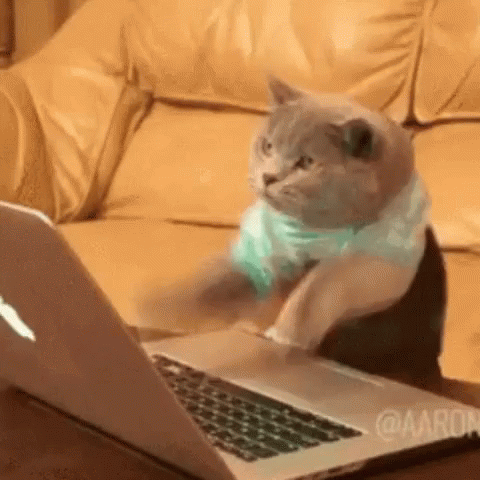 

In [110]:
import os
import pandas as pd
from googletrans import Translator
import matplotlib.pyplot as plt

# Define the folder path
folder_path = r'C:\Users\aanis\Documents\TEEP_CCU\DATABASE\text'  # Replace with the path to your folder containing CSV files

# Read all the CSV files and store them in a list
all_files = os.listdir(folder_path)
all_files = [file for file in all_files if file.endswith('.csv')]
df_list = []



In [111]:
"""
for file in all_files:
    df = pd.read_csv(os.path.join(folder_path, file))
    df = df.dropna(axis=1, how='all')  # Drop columns with all NaN values
    df_list.append(df)

parameters = ['AMB_TEMP',
            'CH4',
            'CO',
            'NMHC',
            'NO',
            'NO2',
            'NOx',
            'O3',
            'PM10',
            'PM2.5',
            'RAINFALL',
            'RH',
            'SO2',
            'THC',
            'WD_HR',
            'WIND_DIREC',
            'WIND_SPEED',
            'WS_HR'
]

translator = Translator()

for city in df_list:
    #print city name
    city_name = city.iloc[0, 0]
    en_city_name = translator.translate(city_name, src='zh-cn', dest='en')
    print(city_name)

    city_matrix = city.iloc[0:, 3:28]

    city_array = city_matrix.to_numpy()
    city_list = [[]for i in range(18)]


    try:
        for i in range(6570):
            for j in range(24):
                city_list[i % 18].append(city_array[i][j])

        city_df = pd.DataFrame(city_list, index = parameters)


        #print city data
        print(city_df)


        print("\n")
    except IndexError as e:
        print("Error in input: ", e)
        city_df = pd.DataFrame(city_list, index = parameters)

        #print city data
        print(city_df)

        print("\n")
    
    #save the data to a csv file
    city_df.to_csv(os.path.join(folder_path, city_name + '.csv'))

print("\n")

"""

'\nfor file in all_files:\n    df = pd.read_csv(os.path.join(folder_path, file))\n    df = df.dropna(axis=1, how=\'all\')  # Drop columns with all NaN values\n    df_list.append(df)\n\nparameters = [\'AMB_TEMP\',\n            \'CH4\',\n            \'CO\',\n            \'NMHC\',\n            \'NO\',\n            \'NO2\',\n            \'NOx\',\n            \'O3\',\n            \'PM10\',\n            \'PM2.5\',\n            \'RAINFALL\',\n            \'RH\',\n            \'SO2\',\n            \'THC\',\n            \'WD_HR\',\n            \'WIND_DIREC\',\n            \'WIND_SPEED\',\n            \'WS_HR\'\n]\n\ntranslator = Translator()\n\nfor city in df_list:\n    #print city name\n    city_name = city.iloc[0, 0]\n    en_city_name = translator.translate(city_name, src=\'zh-cn\', dest=\'en\')\n    print(city_name)\n\n    city_matrix = city.iloc[0:, 3:28]\n\n    city_array = city_matrix.to_numpy()\n    city_list = [[]for i in range(18)]\n\n\n    try:\n        for i in range(6570):\n        

In [112]:
folder_path_images = r'C:\Users\aanis\Documents\TEEP_CCU\DATABASE\images'

# folder names have format: somenumber_cityname, make it only cityname

# for folder in os.listdir(folder_path_images):
#     city_name = folder.split('_')[1]
#     print(city_name)
#     os.rename(os.path.join(folder_path_images, folder), os.path.join(folder_path_images, city_name))

In [113]:
## THIS OPERATION IS FOR RENAMING THE IMAGES IN THE FOLDERS ( ITS DONE ONCE AND NOT NEEDED TO BE DONE AGAIN )

for city in os.listdir(folder_path_images):
    # print(city)
    # os.rename(os.path.join(folder_path_images, folder), os.path.join(folder_path_images, city_name))

    # city_images_path = os.path.join(folder_path_images, city)

    # inside are folders in the format yyyymmdd
    # containing jpg images of the city in the format somenumber_yyyymmddhhmm.jpg
    # rename the images to yyyymmddhhmm.jpg

    """
    ## THIS OPERATION IS FOR RENAMING THE IMAGES IN THE FOLDERS ( ITS DONE ONCE AND NOT NEEDED TO BE DONE AGAIN)

    for folder in os.listdir(city_images_path):
        date = folder
        print(date)
        for image in os.listdir(os.path.join(city_images_path, folder)):
            time = image
            new_name = time[4:]
            print(new_name)
            os.rename(os.path.join(city_images_path, folder, image), os.path.join(city_images_path, folder, new_name))


    """

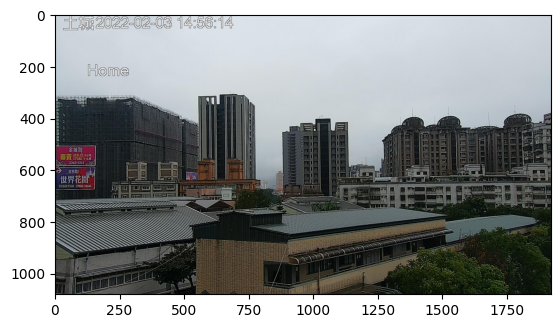

In [114]:
def get_image(city_name, date_time):
    city_folder = os.path.join(folder_path_images, city_name)
    date_folder = os.path.join(city_folder, date_time[:8])
    image_name = date_time + '.jpg'
    image_path = os.path.join(date_folder, image_name)
    return image_path

# print(get_image('city', '202101010000'))

# if error comes say image data is not availiabe for the given date and time

date_time = input("Enter the date and time in the format yyyymmddhhmm: ")
city_name = input("Enter the city name: Keelung, Xizhi, Wanli, New store, Tucheng, Banqiao, Xinzhuang, Cai Liao, Linkou, Chiayi")    

image = plt.imread(get_image(city_name, date_time))
plt.imshow(image)
plt.show()

# open image in a photos app
# os.system(get_image(city_name, date_time))

## Modelling 💃

In [115]:
import pandas as pd
import numpy as np
from PIL import Image
import os


from datetime import datetime, timedelta

In [126]:
# folder_path_images = r'C:\Users\aanis\Documents\TEEP_CCU\DATABASE\images'
# folder_path = r'C:\Users\aanis\Documents\TEEP_CCU\DATABASE\text'

city_name = 'Keelung'
pollutant_data = pd.read_csv(os.path.join(folder_path, city_name + '.csv'))

pollutant_data.head()

def get_datetime_from_hour(nth_hour):

    base_datetime = datetime(2022, 1, 1)  # Starting datetime (Jan 1st, 2022)
    target_datetime = base_datetime + timedelta(hours=nth_hour - 1)  # Adjust for 0-based index
    return target_datetime.strftime("%Y%m%d%H%M")

def get_hour_from_datetime(datetime_str):
    target_datetime = datetime.strptime(datetime_str, "%Y%m%d%H%M")
    base_datetime = datetime(2022, 1, 1)  # Starting datetime (Jan 1st, 2022)
    return int((target_datetime - base_datetime).total_seconds() / 3600 + 1)  # Adjust for 0-based index

def timestamp_to_filename(timestamp):
    return f'{timestamp}.jpg'

get_hour_from_datetime('202212312300')

# Extract pollutant names and data
pollutant_names = pollutant_data.iloc[:, 0]
pollutant_levels = pollutant_data.iloc[:, 1:].transpose()  # Transpose to match with image data

# print(pollutant_names)
# # pollutant_levels.head()

timestamps = pollutant_data.columns[1:]  # Extract columns which seem to be timestamps


# #get all dates of 2022 in the format yyyymmdd in dates array
dates = [datetime(2022, 1, 1) + timedelta(days=i) for i in range(365)]
dates = [date.strftime('%Y%m%d') for date in dates]


print(pollutant_levels)


        0     1     2     3    4    5    6     7     8     9    10    11   12  \
0     14.8  1.95   0.2  0.03  0.6  2.2  2.9  42.3  21.0  11.0  1.0  98.0  1.3   
1     14.7   2.0  0.24  0.03  1.1  3.8  4.9  40.2  15.0  10.0  1.0  98.0  1.2   
2     14.7  1.99  0.24  0.04  0.8  3.6  4.5  36.9  14.0   9.0  0.0  98.0  1.2   
3     14.7  1.98  0.25  0.04  0.9  3.6  4.6  36.2  19.0  13.0  0.5  98.0  1.0   
4     14.6  1.97  0.26  0.03  1.0  3.6  4.6  30.8  17.0  11.0  0.0  98.0  1.0   
...    ...   ...   ...   ...  ...  ...  ...   ...   ...   ...  ...   ...  ...   
8755  16.5  2.06  0.23  0.01  0.5  3.2  3.8  45.8  29.0  13.0  4.0  99.0  1.5   
8756  16.8  2.05  0.22  0.02  0.6  3.1  3.7  45.7  27.0  14.0  3.5  98.0  1.5   
8757  17.0  2.05  0.22  0.01  0.6  2.9  3.6  45.3  28.0   9.0  2.5  97.0  1.5   
8758  17.0  2.05  0.22  0.01  0.6  2.7  3.4  45.0  20.0  10.0  4.5  98.0  1.5   
8759  17.2  2.05  0.21  0.01  0.7  2.7  3.5  44.5  22.0  17.0  4.5  99.0  1.7   

        13     14     15   

In [8]:
# Image.open(r"C:\Users\aanis\Documents\TEEP_CCU\DATABASE\images\Keelung\20220201\202202011500.jpg")


In [ ]:
## It takes around 5 minutes to run this code 

import PIL
city_name = 'Keelung'

# Load images and match with pollutant data
images = []
labels = []

# img_filename = timestamp_to_filename(get_datetime_from_hour(timestamp + 18))

get_datetime_from_hour(8760)

for date in dates:
    # print(date)
    for hr in range(0, 24):
        hr = str(hr).zfill(2)
        # print(hr)
        yyyymmddhh00 = date + hr + "00"

        # img_path = os.path.join(folder_path_images, city_name, date, img_filename)
        # print(img_path)

        try:
            img = Image.open(get_image(city_name, yyyymmddhh00)).resize((128, 128))
            img = np.array(img)
            images.append(img)
            label = pollutant_levels.iloc[get_hour_from_datetime(yyyymmddhh00)-1]
            labels.append(label)
            print("Image "+ yyyymmddhh00 + " exists")
        except (PIL.UnidentifiedImageError, OSError) as e:
            print("Error: Unable to process image file:", yyyymmddhh00)
            labels.append([np.nan for i in range(18)])
            images.append(np.zeros((128, 128, 3)))
            continue



Error: Unable to process image file: 202201010000
Error: Unable to process image file: 202201010100
Error: Unable to process image file: 202201010200
Error: Unable to process image file: 202201010300
Error: Unable to process image file: 202201010400
Error: Unable to process image file: 202201010500
Error: Unable to process image file: 202201010600
Error: Unable to process image file: 202201010700
Error: Unable to process image file: 202201010800
Error: Unable to process image file: 202201010900
Error: Unable to process image file: 202201011000
Error: Unable to process image file: 202201011100
Error: Unable to process image file: 202201011200
Error: Unable to process image file: 202201011300
Error: Unable to process image file: 202201011400
Error: Unable to process image file: 202201011500
Error: Unable to process image file: 202201011600
Error: Unable to process image file: 202201011700
Error: Unable to process image file: 202201011800
Error: Unable to process image file: 202201011900


In [174]:
import imageio

images = np.array(images)
labels = np.array(labels)

# Normalize image data if necessary
images = images / 255.0

# Save images as GIF
# imageio.mimsave('city_images.gif', images)

In [175]:
print(images.shape)
print(labels.shape)

print(images[744])
print(labels[744])

(8760, 128, 128, 3)
(8760, 18)
[[[0.0627451  0.0627451  0.0627451 ]
  [0.06666667 0.06666667 0.06666667]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 [[0.23921569 0.23921569 0.23921569]
  [0.23137255 0.23137255 0.23137255]
  [0.01960784 0.01960784 0.01960784]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 [[0.22745098 0.22745098 0.22745098]
  [0.18039216 0.18039216 0.18039216]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 ...

 [[0.1372549  0.1372549  0.1372549 ]
  [0.12941176 0.12941176 0.12941176]
  [0.12156863 0.12156863 0.12156863]
  ...
  [0.17254902 0.17254902 0.17254902]
  [0.18431373 0.18431373 0.18431373]
  [0.21960784 0.21960784 0.21960784]]

 [[0.15686275 0.15686275 0.15686275]
  [0.1

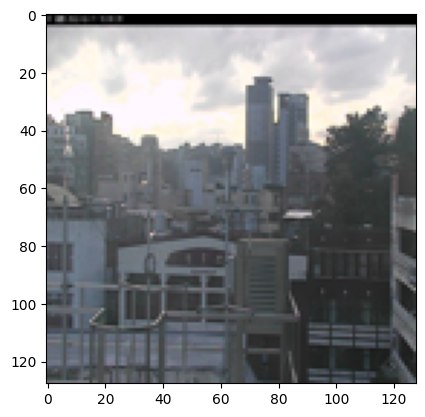

0       AMB_TEMP
1            CH4
2             CO
3           NMHC
4             NO
5            NO2
6            NOx
7             O3
8           PM10
9          PM2.5
10      RAINFALL
11            RH
12           SO2
13           THC
14         WD_HR
15    WIND_DIREC
16    WIND_SPEED
17         WS_HR
Name: Unnamed: 0, dtype: object
['AMB_TEMP' 'CH4' 'CO' 'NMHC' 'NO' 'NO2' 'NOx' 'O3' 'PM10' 'PM2.5'
 'RAINFALL' 'RH' 'SO2' 'THC' 'WD_HR' 'WIND_DIREC' 'WIND_SPEED' 'WS_HR']


In [179]:

def ShowImgLabel(DateTime):
    hr = get_hour_from_datetime(DateTime) -1
    plt.imshow(images[hr])
    plt.show()

    print(pollutant_names)
    # pollutant names into an array

    pollutant_names = pollutant_names.to_numpy()
    print(pollutant_names)


